<a href="https://colab.research.google.com/github/Ratan-jeet/ML/blob/main/Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Titanic Data
df = pd.read_csv('train.csv')

In [4]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [5]:
# Taking only two columns
df=df[['Age','Fare','Survived']]

In [6]:
df.sample(2)

,Age,Fare,Survived
266,16.0,39.6875,0
582,54.0,26.0000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [8]:
df.isnull().sum()

,0
Age,177
Fare,0
Survived,0


In [9]:
# null values with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-9-23ac7a93dc59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [10]:
df.isnull().sum()

,0
Age,0
Fare,0
Survived,0


In [11]:
df.sample(2)

,Age,Fare,Survived
69,26.00,8.6625,0
78,0.83,29.0000,1


In [12]:
# input output
x=df.drop('Survived',axis=1)
y=df['Survived']

In [13]:
x.sample(2),y.sample(2)

(      Age    Fare
 202  34.0  6.4958
 816  23.0  7.9250,
 769    0
 22     1
 Name: Survived, dtype: int64)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# split train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
# plot distribution of data
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import ProbPlot  # Import ProbPlot from statsmodels


<ipython-input-17-747192caa537>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

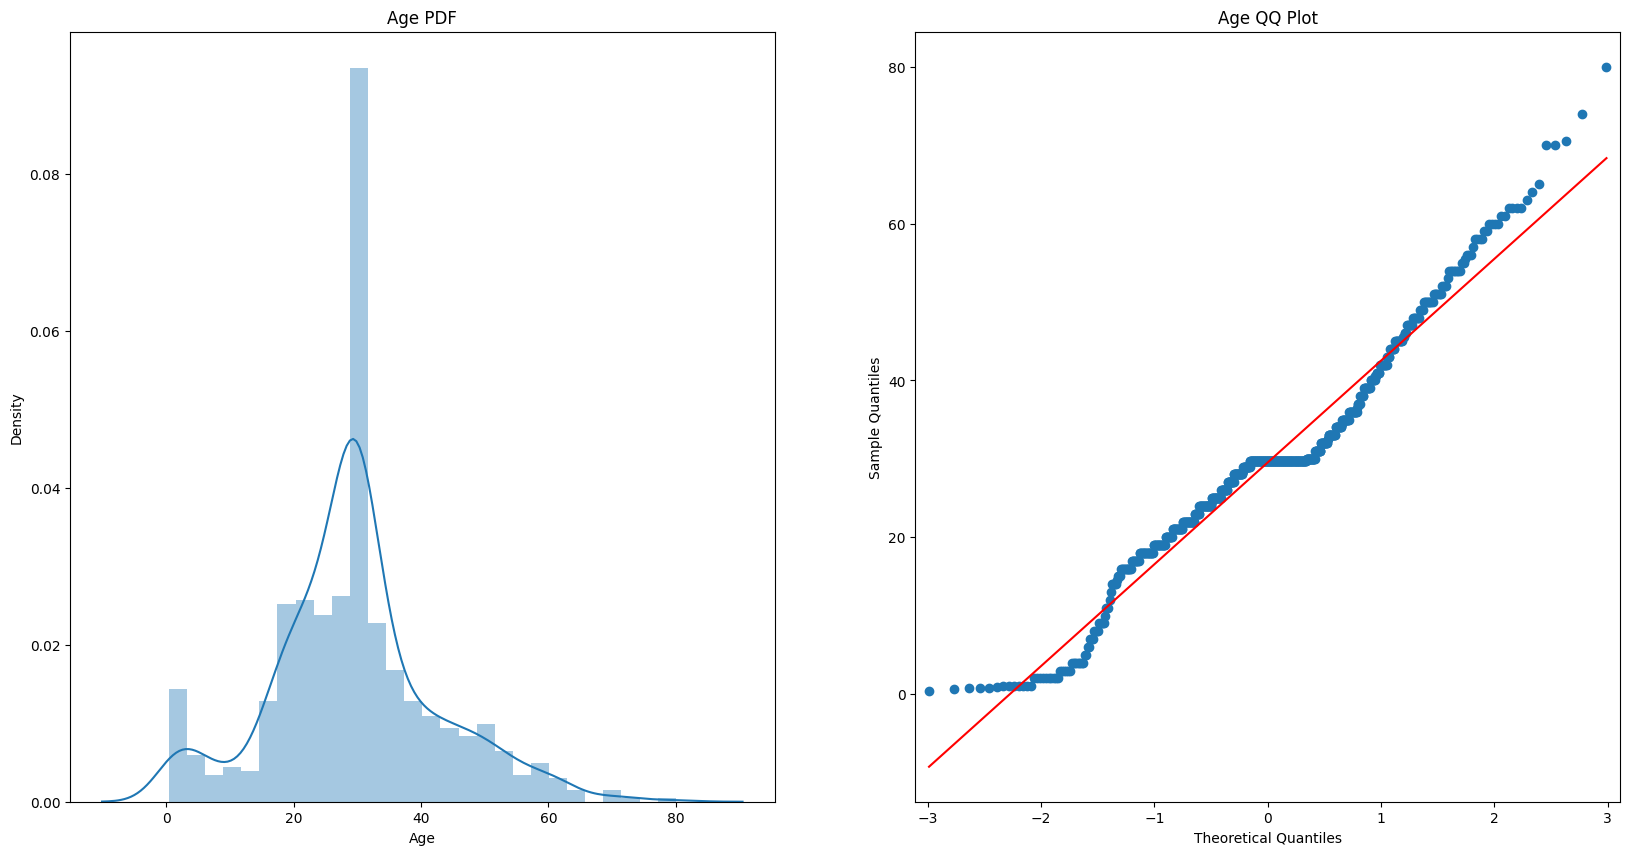

In [17]:

plt.figure(figsize=(20, 10))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
# Pass the scipy.stats.norm distribution object instead of the string "norm"
ProbPlot(x_train['Age'], dist=stats.norm).qqplot(line='s', ax=plt.gca())
plt.title('Age QQ Plot')

<ipython-input-18-22a39b8fd1c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

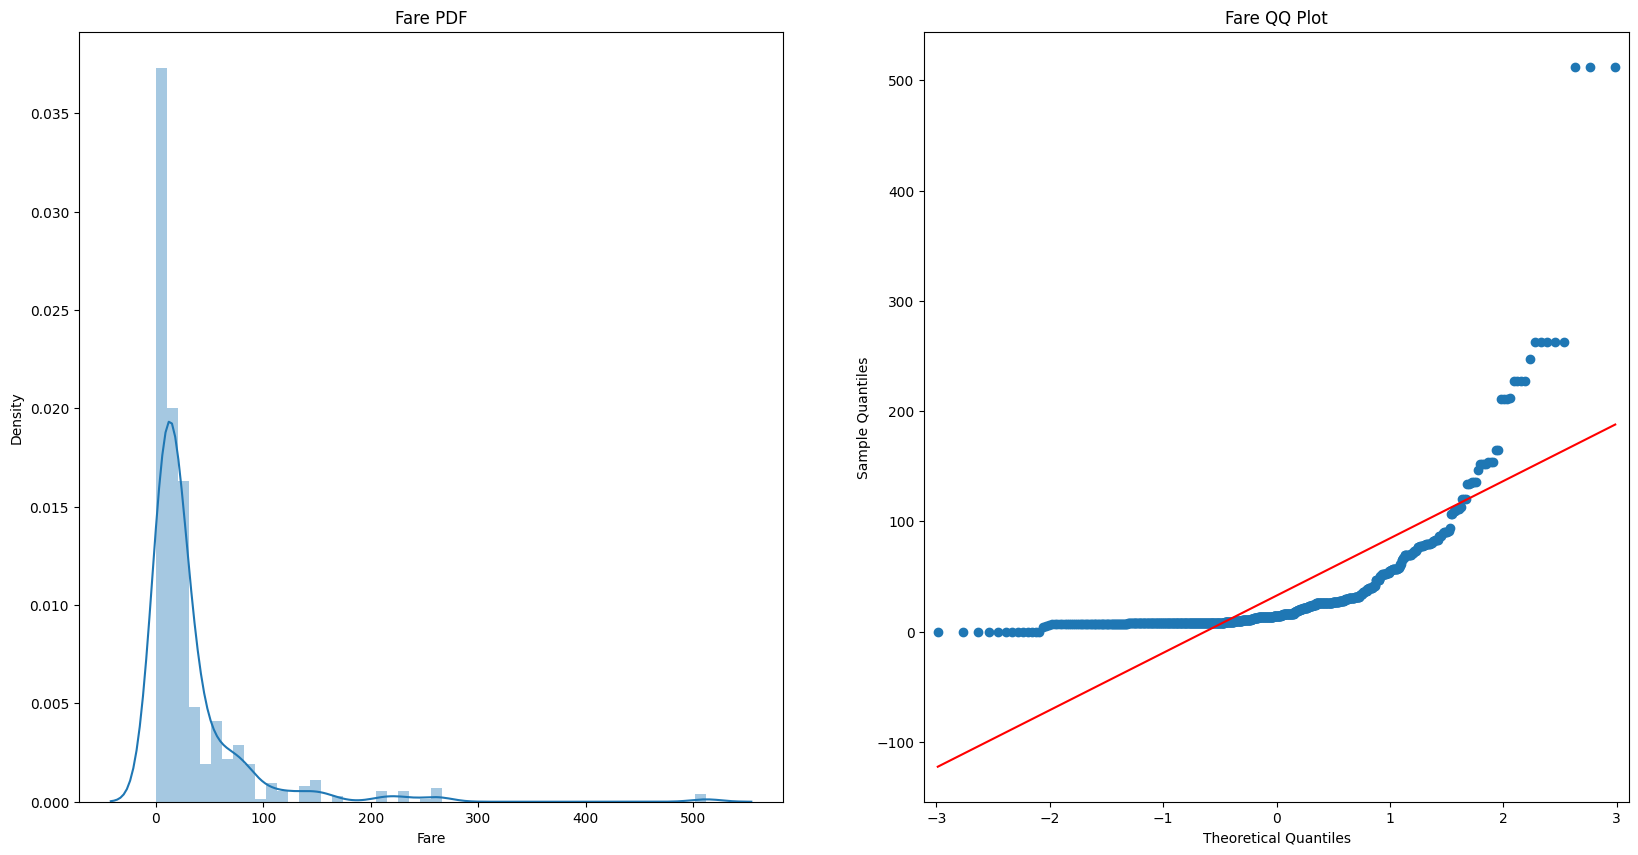

In [18]:

plt.figure(figsize=(20, 10))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
# Pass the scipy.stats.norm distribution object instead of the string "norm"
ProbPlot(x_train['Fare'], dist=stats.norm).qqplot(line='s', ax=plt.gca())
plt.title('Fare QQ Plot')

In [19]:
# train linear model and decision tree model without Transformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [21]:
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

In [23]:
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

In [24]:
acc1,acc2

(0.6480446927374302, 0.6759776536312849)

In [25]:
# train linear model and decision tree model without Transformer
from sklearn.preprocessing import FunctionTransformer

In [26]:
trf = FunctionTransformer(np.log1p) # log1np will add 1 to the value and returns log of value

In [27]:
# Transform
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)


In [28]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [29]:
clf1.fit(x_train_trf, y_train)
clf2.fit(x_train_trf, y_train)

DecisionTreeClassifier()

In [30]:
y_pred1 = clf1.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

In [31]:
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

In [32]:
acc1,acc2

(0.6815642458100558, 0.6815642458100558)

#  QQ plot before and after transformation

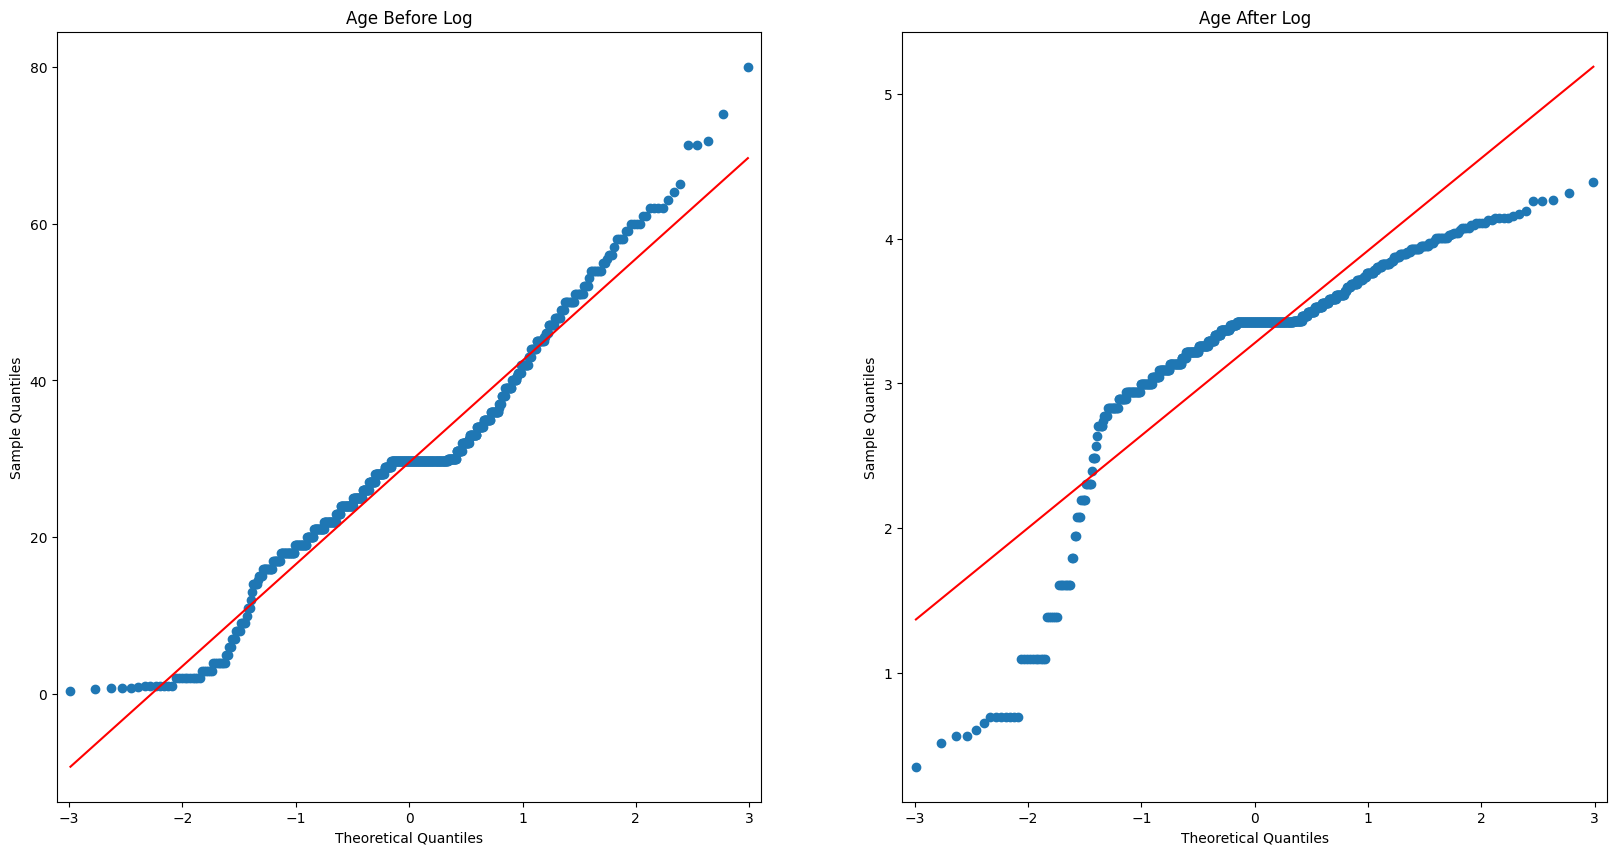

In [33]:
#  QQ plot before and after transformation
plt.figure(figsize=(20, 10))
plt.subplot(121)
ProbPlot(x_train['Age'], dist=stats.norm).qqplot(line='s', ax=plt.gca())
plt.title('Age Before Log')

plt.subplot(122)
ProbPlot(x_train_trf['Age'], dist=stats.norm).qqplot(line='s', ax=plt.gca())
plt.title('Age After Log')
plt.show()

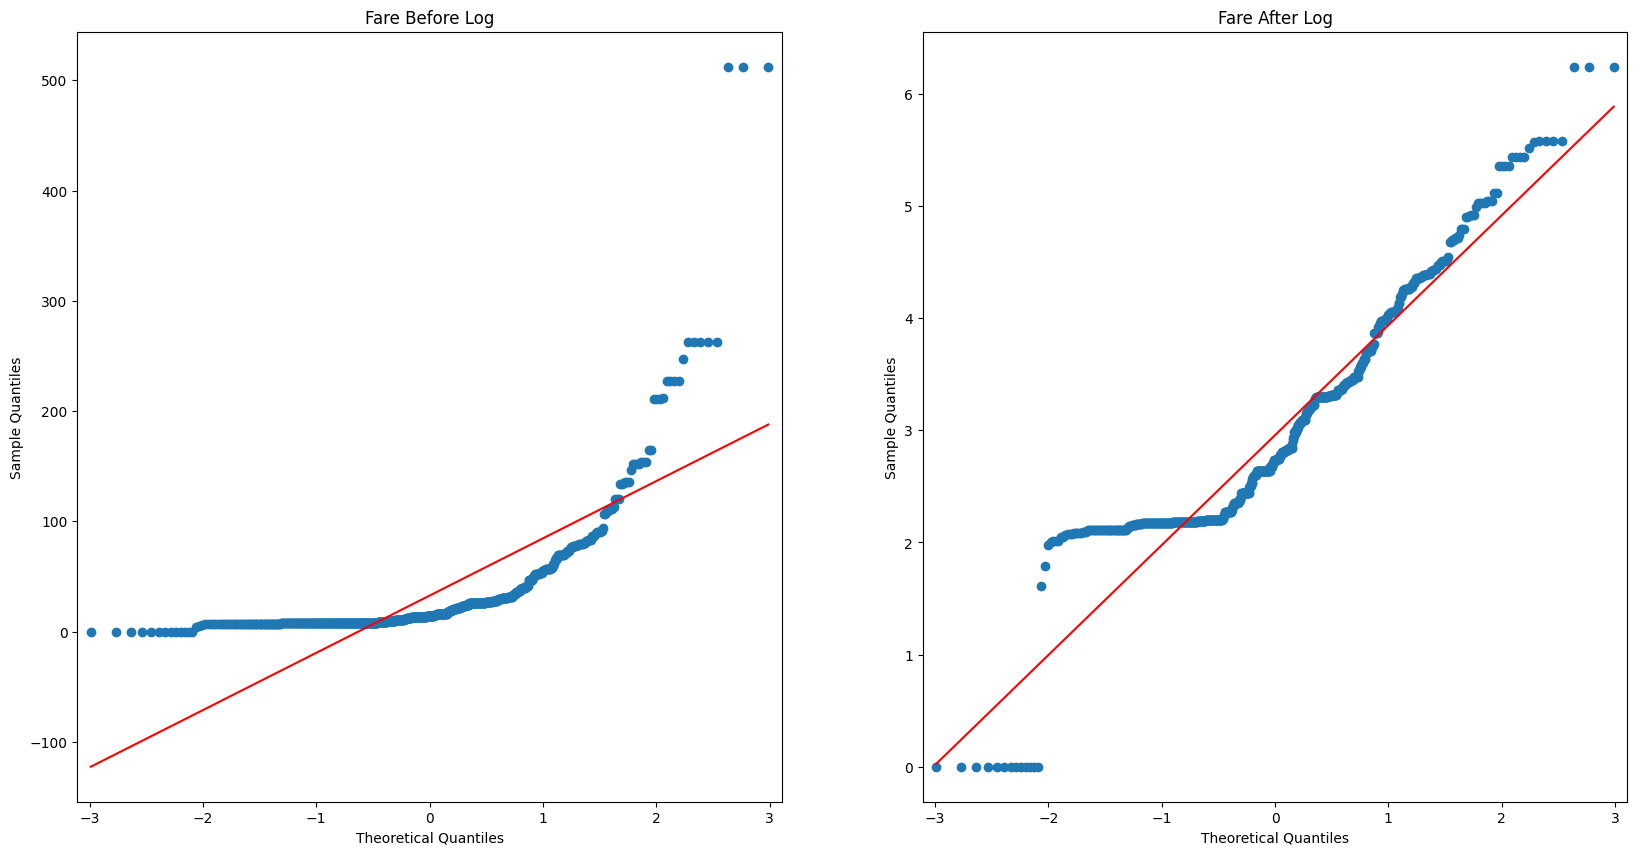

In [34]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
ProbPlot(x_train['Fare'], dist=stats.norm).qqplot(line='s', ax=plt.gca())
plt.title('Fare Before Log')

plt.subplot(122)
ProbPlot(x_train_trf['Fare'], dist=stats.norm).qqplot(line='s', ax=plt.gca())
plt.title('Fare After Log')
plt.show()

After Applying Log transform My Fare column is improving but Age column is becoming worse
so we will apply functionn transform for Fare only


In [35]:
from sklearn.compose import ColumnTransformer

In [36]:
trf = ColumnTransformer([
    ('mylog',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [37]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [38]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [39]:
clf1.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

DecisionTreeClassifier()

In [40]:
y_pred1 = clf1.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

In [41]:
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

In [42]:
acc1,acc2

(0.6703910614525139, 0.6759776536312849)

# Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
x_transformed = trf.fit_transform(x)

In [45]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [46]:
print("Logistic Regression:",np.mean(cross_val_score(clf1,x_transformed,y,cv=10,scoring='accuracy')))
print("Decision Tree:",np.mean(cross_val_score(clf2,x_transformed,y,cv=10,scoring='accuracy')))

Logistic Regression: 0.6712609238451936
Decision Tree: 0.6622097378277154
